<img src="../../../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">


# _*Quantum K-Means algorithm*_ 

The latest version of this notebook is available on https://github.com/qiskit/qiskit-tutorial.

***
### Contributors 
Shan Jin, Xi He, Xiaokai Hou, Li Sun, Dingding Wen, Shaojun Wu and Xiaoting Wang$^{1}$

1. Institute of Fundamental and Frontier Sciences, University of Electronic Science and Technology of China，Chengdu, China，610051
***

## Introduction
Clustering algorithm is a typical unsupervised learning algorithm, which is mainly used to automatically classify similar samples into one category.In the clustering algorithm, according to the similarity between the samples, the samples are divided into different categories. For different similarity calculation methods, different clustering results will be obtained. The commonly used similarity calculation method is the Euclidean distance method.
What we want to show is the quantum K-Means algorithm. The K-Means algorithm is a distance-based clustering algorithm that uses distance as an evaluation index for similarity, that is, the closer the distance between two objects is, the greater the similarity. The algorithm considers the cluster to be composed of objects that are close together, so the compact and independent cluster is the ultimate target.


#### Experiment design
The implementation of the quantum K-Means algorithm mainly uses the swap test to compare the distances among the input data points. Select K points randomly from N data points as centroids, measure the distance from each point to each centroid, and assign it to the nearest centroid- class, recalculate centroids of each class that has been obtained, and iterate 2 to 3 steps until the new centroid is equal to or less than the specified threshold, and the algorithm ends. In our example, we selected 6 data points, 2 centroids, and used the swap test circuit to calculate the distance. Finally, we obtained two clusters of data points.
$|0\rangle$ is an auxiliary qubit, through left $H$ gate, it will be changed to $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$. Then under the control of $|1\rangle$, the circuit will swap two vectors $|x\rangle$ and $|y\rangle$. Finally, we get the result at the right end of the circuit:
$$|0_{anc}\rangle |x\rangle |y\rangle \rightarrow \frac{1}{2}|0_{anc}\rangle(|xy\rangle + |yx\rangle) + \frac{1}{2}|1_{anc}\rangle(|xy\rangle - |yx\rangle)$$
If we measure auxiliary qubit alone, then the probability of final state in the ground state $|1\rangle$ is:
$$P(|1_{anc}\rangle) = \frac{1}{2} - \frac{1}{2}|\langle x | y \rangle|^2$$
If we measure auxiliary qubit alone, then the probability of final state in the ground state $|1\rangle$ is:
$$Euclidean \ distance = \sqrt{(2 - 2|\langle x | y \rangle|)}$$
So, we can see that the probability of measuring $|1\rangle$ has positive correlation with the Euclidean distance.
The schematic diagram of quantum K-Means is as the follow picture.[[1]](#cite) 
<img src="../images/k_means_circuit.png">
To make our algorithm can be run using qiskit, we design a more detailed circuit to achieve our algorithm. 
|
#### Quantum K-Means circuit
<img src="../images/k_means.png">

## Data points
<table border="1">
<tr>
<td>point num</td>
<td>theta</td>
<td>phi</td>
<td>lam</td>
<td>x</td>
<td>y</td>
</tr>
<tr>
<td>1</td>
<td>0.01</td>
<td>pi</td>
<td>pi</td>
<td>0.710633</td>
<td>0.703562</td>
</tr>
<tr>
<td>2</td>
<td>0.02</td>
<td>pi</td>
<td>pi</td>
<td>0.714142</td>
<td>0.7</td>
</tr>
<tr>
<td>3</td>
<td>0.03</td>
<td>pi</td>
<td>pi</td>
<td>0.717633</td>
<td>0.696421</td>
</tr>
<tr>
<td>4</td>
<td>0.04</td>
<td>pi</td>
<td>pi</td>
<td>0.721107</td>
<td>0.692824</td>
</tr>
<tr>
<td>5</td>
<td>0.05</td>
<td>pi</td>
<td>pi</td>
<td>0.724562</td>
<td>0.68921</td>
</tr>
<tr>
<td>6</td>
<td>1.31</td>
<td>pi</td>
<td>pi</td>
<td>0.886811</td>
<td>0.462132</td>
</tr>
<tr>
<td>7</td>
<td>1.32</td>
<td>pi</td>
<td>pi</td>
<td>0.889111</td>
<td>0.457692</td>
</tr>
<tr>
<td>8</td>
<td>1.33</td>
<td>pi</td>
<td>pi</td>
<td>0.891388</td>
<td>0.453241</td>
</tr>
<tr>
<td>9</td>
<td>1.34</td>
<td>pi</td>
<td>pi</td>
<td>0.893643</td>
<td>0.448779</td>
</tr>
<tr>
<td>10</td>
<td>1.35</td>
<td>pi</td>
<td>pi</td>
<td>0.895876</td>
<td>0.444305</td>
</tr>


## Quantum K-Means algorithm program

In [1]:
# import math lib
from math import pi

# import Qiskit
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [2]:
# To use local qasm simulator
backend = Aer.get_backend('qasm_simulator')

In this section, we first judge the version of Python and import the packages of qiskit, math to implement the following code. We show our algorithm on the ibm_qasm_simulator, if you need to run it on the real quantum conputer, please remove the "#" in frint of "import Qconfig".

In [3]:
theta_list = [0.01, 0.02, 0.03, 0.04, 0.05, 1.31, 1.32, 1.33, 1.34, 1.35]

Here we define the number pi in the math lib, because we need to use u3 gate. And we also define a list about the parameter theta which we need to use in the u3 gate. As the same above, if you want to implement on the real quantum comnputer, please remove the symbol "#" and configure your local Qconfig.py file. 

COMPLETED
theta_1:0.01
theta_2:0.02


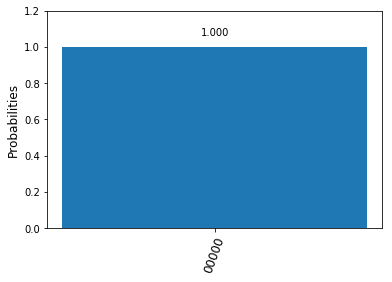

COMPLETED
theta_1:0.01
theta_2:0.03


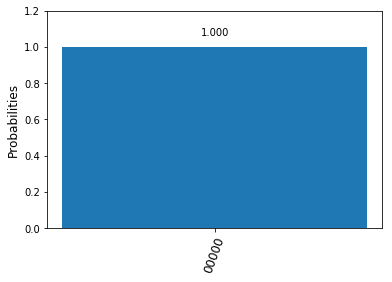

COMPLETED
theta_1:0.01
theta_2:0.04


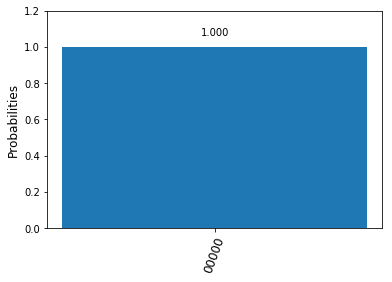

COMPLETED
theta_1:0.01
theta_2:0.05


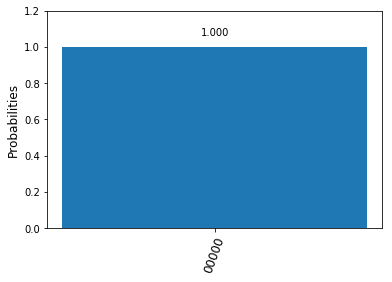

COMPLETED
theta_1:0.01
theta_2:1.31


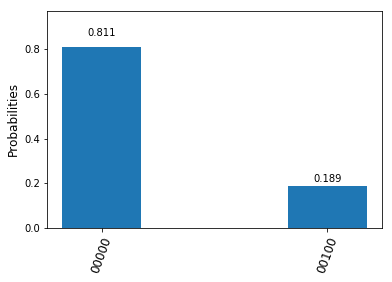

COMPLETED
theta_1:0.01
theta_2:1.32


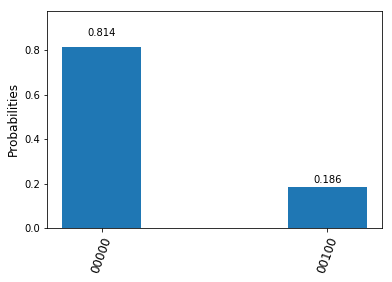

COMPLETED
theta_1:0.01
theta_2:1.33


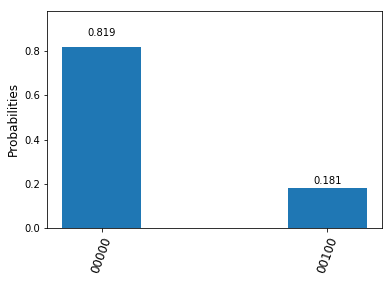

COMPLETED
theta_1:0.01
theta_2:1.34


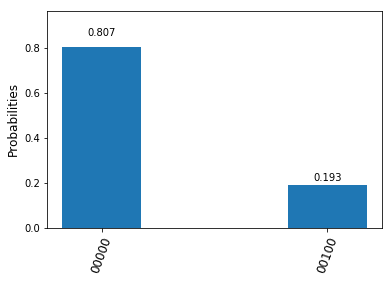

COMPLETED
theta_1:0.01
theta_2:1.35


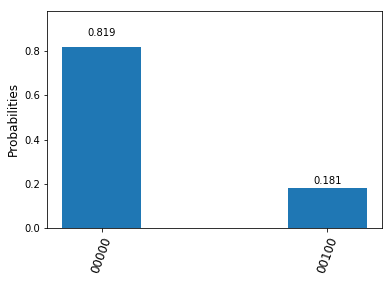

COMPLETED
theta_1:0.02
theta_2:0.03


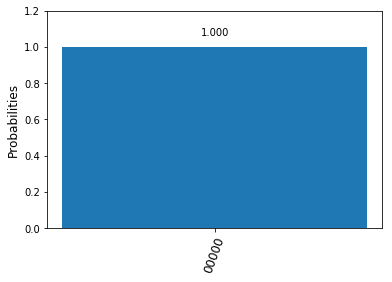

COMPLETED
theta_1:0.02
theta_2:0.04


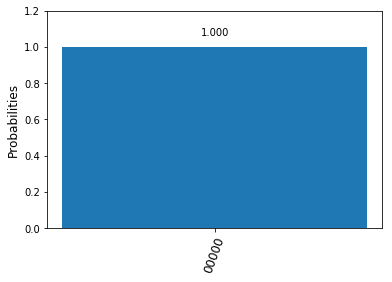

COMPLETED
theta_1:0.02
theta_2:0.05


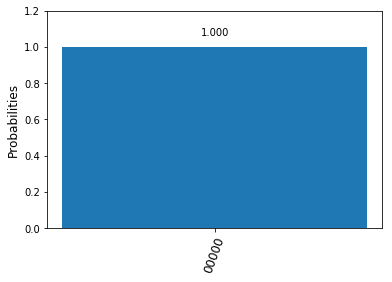

COMPLETED
theta_1:0.02
theta_2:1.31


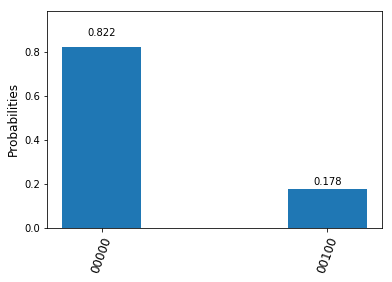

COMPLETED
theta_1:0.02
theta_2:1.32


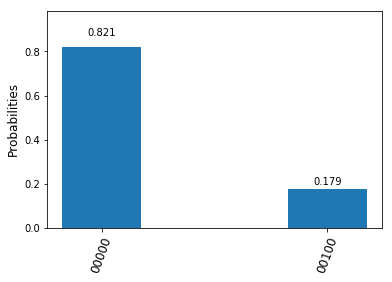

COMPLETED
theta_1:0.02
theta_2:1.33


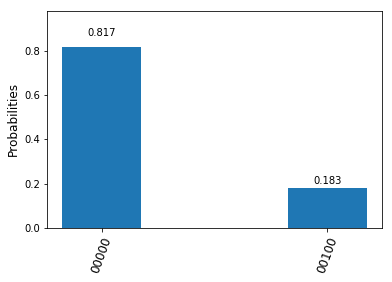

COMPLETED
theta_1:0.02
theta_2:1.34


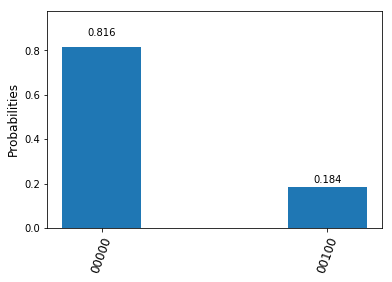

COMPLETED
theta_1:0.02
theta_2:1.35


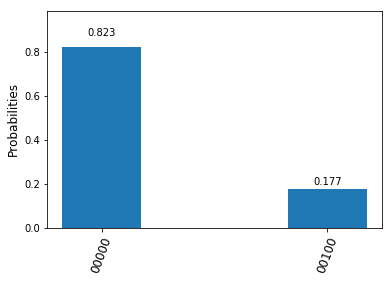

COMPLETED
theta_1:0.03
theta_2:0.04


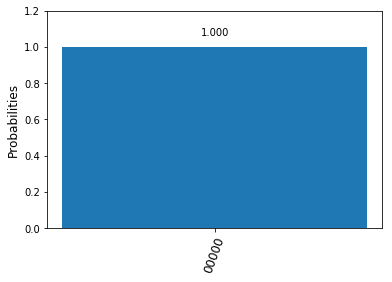

COMPLETED
theta_1:0.03
theta_2:0.05


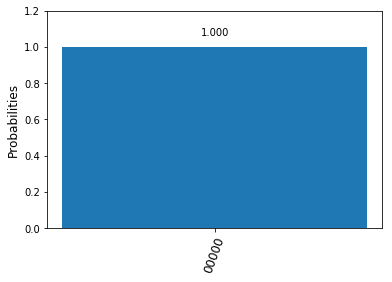

COMPLETED
theta_1:0.03
theta_2:1.31


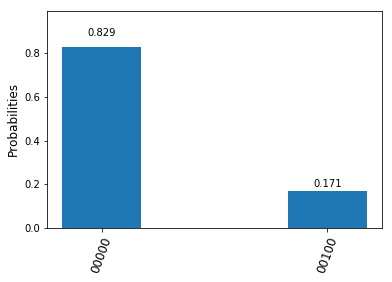

COMPLETED
theta_1:0.03
theta_2:1.32


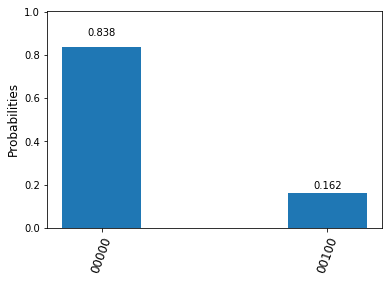

COMPLETED
theta_1:0.03
theta_2:1.33


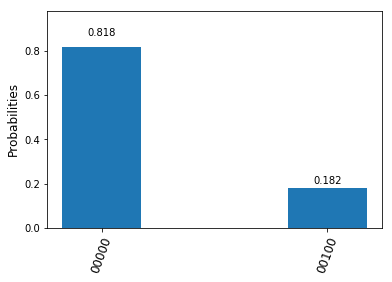

COMPLETED
theta_1:0.03
theta_2:1.34


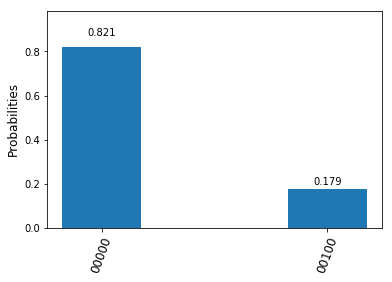

COMPLETED
theta_1:0.03
theta_2:1.35


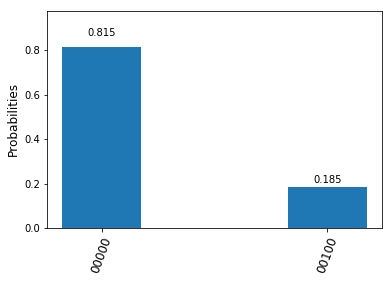

COMPLETED
theta_1:0.04
theta_2:0.05


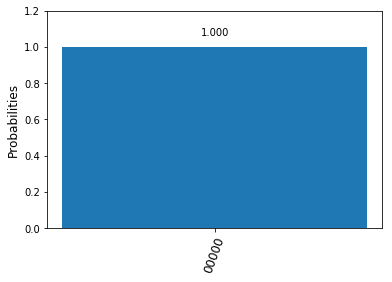

COMPLETED
theta_1:0.04
theta_2:1.31


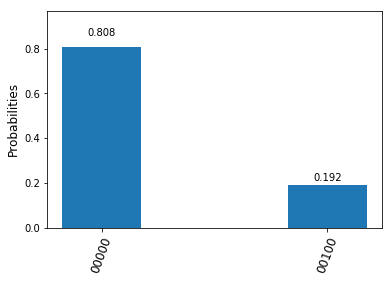

COMPLETED
theta_1:0.04
theta_2:1.32


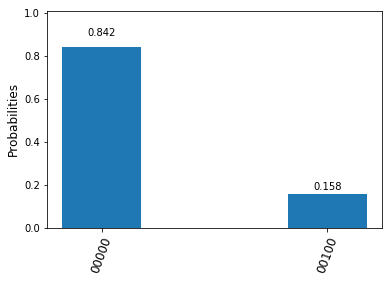

COMPLETED
theta_1:0.04
theta_2:1.33


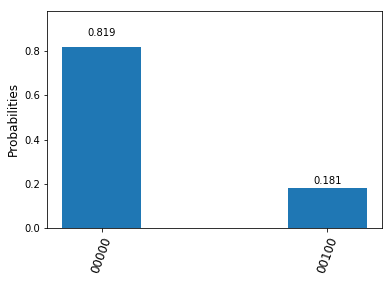

COMPLETED
theta_1:0.04
theta_2:1.34


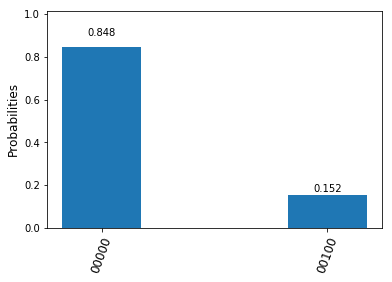

COMPLETED
theta_1:0.04
theta_2:1.35


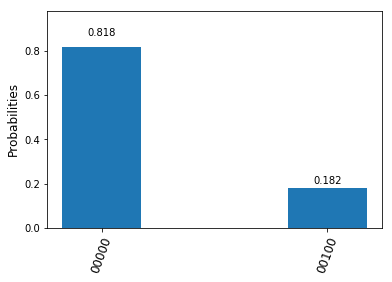

COMPLETED
theta_1:0.05
theta_2:1.31


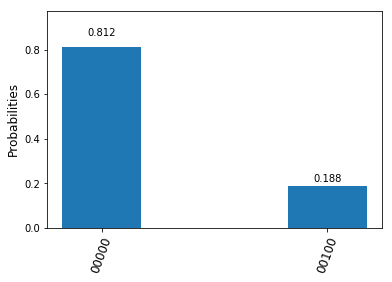

COMPLETED
theta_1:0.05
theta_2:1.32


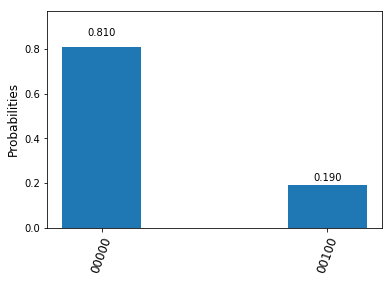

COMPLETED
theta_1:0.05
theta_2:1.33


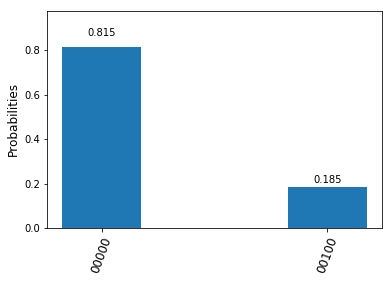

COMPLETED
theta_1:0.05
theta_2:1.34


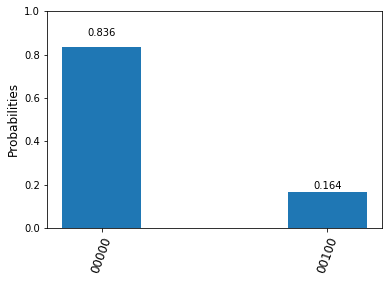

COMPLETED
theta_1:0.05
theta_2:1.35


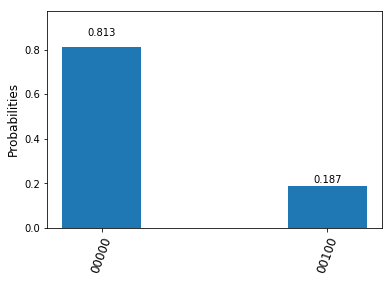

COMPLETED
theta_1:1.31
theta_2:1.32


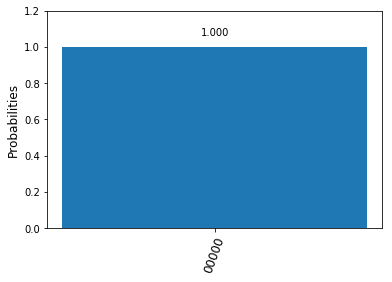

COMPLETED
theta_1:1.31
theta_2:1.33


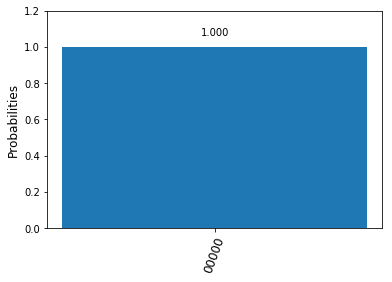

COMPLETED
theta_1:1.31
theta_2:1.34


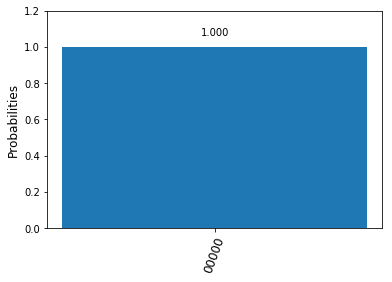

COMPLETED
theta_1:1.31
theta_2:1.35


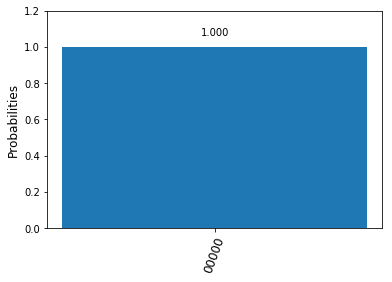

COMPLETED
theta_1:1.32
theta_2:1.33


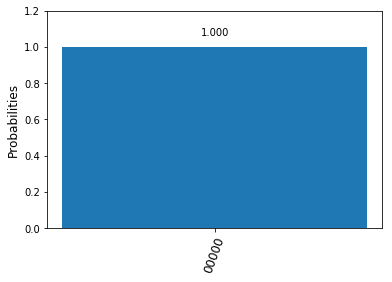

COMPLETED
theta_1:1.32
theta_2:1.34


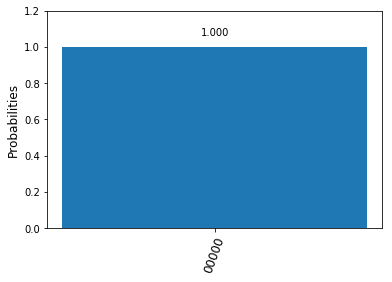

COMPLETED
theta_1:1.32
theta_2:1.35


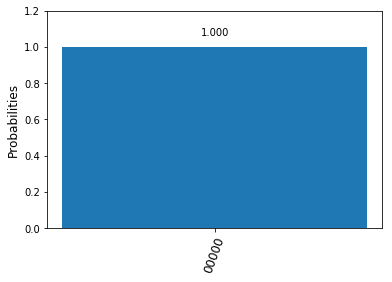

COMPLETED
theta_1:1.33
theta_2:1.34


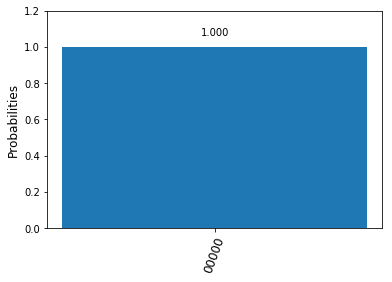

COMPLETED
theta_1:1.33
theta_2:1.35


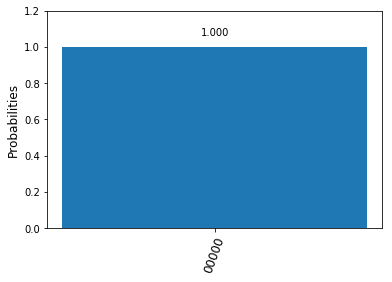

COMPLETED
theta_1:1.34
theta_2:1.35


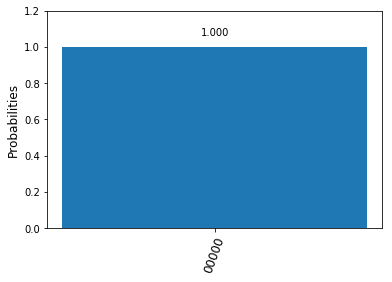

In [4]:
# create Quantum Register called "qr" with 5 qubits
qr = QuantumRegister(5, name="qr")
# create Classical Register called "cr" with 5 bits
cr = ClassicalRegister(5, name="cr")
    
# Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = QuantumCircuit(qr, cr, name="k_means")
    
#Define a loop to compute the distance between each pair of points
for i in range(9):
    for j in range(1,10-i):
        # Set the parament theta about different point
        theta_1 = theta_list[i]
        theta_2 = theta_list[i+j]
        #Achieve the quantum circuit via qiskit
        qc.h(qr[2])
        qc.h(qr[1])
        qc.h(qr[4])
        qc.u3(theta_1, pi, pi, qr[1])
        qc.u3(theta_2, pi, pi, qr[4])
        qc.cswap(qr[2], qr[1], qr[4])
        qc.h(qr[2])
                
        qc.measure(qr[2], cr[2])
        qc.reset(qr)
            
        job = execute(qc,   backend=backend, shots=1024)
        result = job.result()   
        print(result)
        print('theta_1:' + str(theta_1))
        print('theta_2:' + str(theta_2))
#         print( result.get_data(qc))
        plot_histogram(result.get_counts())

Here we achieve the function k_means() and the test main function to run the program. Considering the qubits controlling direction of ibmqx4, we takes the quantum register 1, 2, 4 as our working register, if you want to run this program on other computer, please redesign the circuit structure to ensure your program can be run accurately. 

## Result analysis
In this program, we take the quantum register 1, 2, 4 as our operated register (considering the condition when using ibmqx4.) We take the quantum register 1, 4 storing the input information about data points, and the quantum register 2 as controlling register to decide whether to use the swap operator. To estimate the distance of any pair of data points, we use a loop to implement the K-Means Circuit. In the end, we measure the controlling register to judge the distance between two data points. The probability when we get 1 means that the distance between two data points.

## Reference
<cite>[1].Quantum algorithms for supervised and unsupervised machine learning(*see open access: [ arXiv:1307.0411v2](https://arxiv.org/abs/1307.0411)*)</cite><a id='cite'></a>